**K-nearest neighbors**

**(Code: Subhajit Das)**

**What is K-nearest neighbors:**

The K-Nearest Neighbors (KNN) algorithm is a robust and intuitive machine learning method used to tackle classification and regression problems. It’s a type of supervised learning algorithm that is primarily used for its simplicity and ease of implementation.

KNN works on the concept of similarity, predicting the label or value of a new data point by considering its K closest neighbors in the training dataset. It assumes the similarity between the new case/data and available cases and puts the new case into the category that is most similar to the available categories.

KNN is non-parametric, meaning it does not make any underlying assumptions about the distribution of data1. It can handle both numerical and categorical data, making it a flexible choice for various types of datasets.

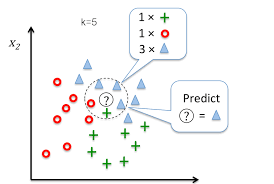

**Where we can use K-nearest neighbors:**

The K-Nearest Neighbors (KNN) algorithm can be used in a variety of applications, including:

1. **Model-free Classification**: KNN is often used for classification tasks where the algorithm predicts the class of a new data point based on its K nearest neighbors.
2. **Regression**: KNN can also be used for regression tasks, such as predicting house prices. Here, KNN predicts the value of a new data point using the average value of its K nearest neighbors.
3. **Pattern Recognition**: KNN finds intense application in pattern recognition.
4. **Text Classification**: KNN can be used to classify text documents based on their content. For example, it can classify a text document based on its category, like sports, crime, etc.
5. **Collaborative Filtering for Recommendation**: KNN is used in recommendation systems, where the algorithm recommends items by finding similar users or items.
6. **Data Compression**: KNN can be used in data compression applications.
7. **Genetics**: KNN is used in genetics for classifying genes.
8. **Economic Forecasting**: KNN is used in economic forecasting.

**How K-nearest neighbors works:**

The K-Nearest Neighbors (KNN) algorithm works in the following way:

1. **Choose the number of neighbors (K)**: The first step in the KNN algorithm is to choose the number of neighbors, denoted by K. This is a hyperparameter that you choose, and it can greatly affect the results of the KNN algorithm.

2. **Calculate Distances**: For each point in the dataset, calculate the distance between that point and the point you're trying to predict. The distance can be calculated in various ways, but the most common method is the Euclidean distance.

3. **Find the K Nearest Neighbors**: After calculating the distances, find the K points in your dataset that are closest to the point you're trying to predict.

4. **Make Prediction**:
    - For **Classification**: The new point is assigned to the class that has the majority among its K nearest neighbors. If there's a tie, the algorithm may choose the class of the nearest point or randomly choose one of the classes.
    - For **Regression**: The prediction for the new point could be the average (or median) of the values of its K nearest neighbors.

5. **Evaluate the model (optional)**: If you have a test dataset, you can evaluate the performance of your KNN model by using metrics such as accuracy for classification or Mean Squared Error (MSE) for regression.

Remember, the choice of K is crucial. A small value of K means that noise will have a higher influence on the result, and a large value makes it computationally expensive. Data scientists usually choose an odd number if the number of classes is 2.

Also, KNN is sensitive to the scale of the data and irrelevant attributes. So, data scaling (normalization or standardization) and feature selection are important preprocessing steps.

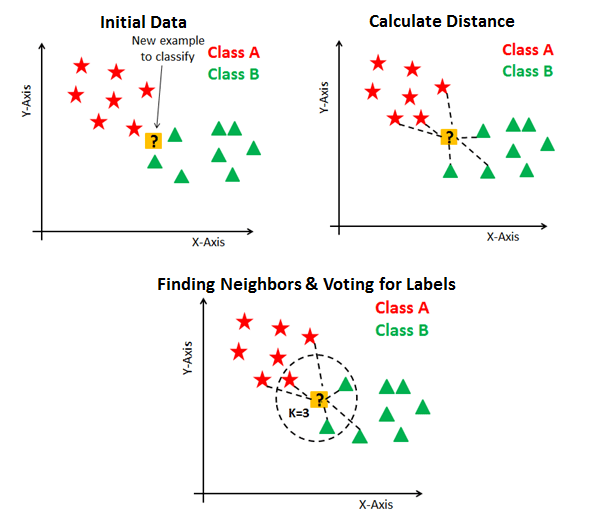

**How to find nearest distance for KNN?**

The K-Nearest Neighbors (KNN) algorithm calculates the distance between the query instance and all the training samples. Here are the steps to compute the nearest distance in KNN:

1. **Determine parameter K**: Decide the number of nearest neighbors (K).

2. **Calculate the Distance**: Calculate the distance between the query instance and all the training samples. The most common method to calculate distance is the Euclidean distance formula: d=√ ((x2-x1)²+ (y2-y1)²)¹. Other methods such as Manhattan or Hamming distance can also be used.

3. **Sort the Distance**: Sort the calculated distances and determine nearest neighbors based on the K-th minimum distance.

4. **Gather the Category**: Gather the category of the nearest neighbors.

**How we can choose factor 'k' in KNN?**

The choice of the factor k in the k-nearest neighbors (KNN) algorithm is crucial and depends on the input data. Here are some methods to choose the optimal k value:

**1. Outliers and Noise**: If the input data has more outliers or noise, a higher value of k would be better.

**2. Odd Value**: It is recommended to choose an odd value for k to avoid ties in classification.

**3. Cross-Validation**: Cross-validation tactics can help you choose the optimal k for your dataset.

**4. Square Root Rule**: A general rule of thumb in choosing the value of k is k = sqrt(N)/2, where N stands for the number of samples in your training dataset.

**5. Trial and Error**: You can also split the dataset as training and testing, choose a range of k values, start from k = 1 and increase the value4. Then, select the k value that gives the best performance on the testing set.

Remember, the optimal k value can vary significantly depending on the specifics of your dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
diabetes_df = pd.read_csv("/content/drive/MyDrive/ML and DL DataSets/9_Diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

**Separating features and labels**

In [ ]:
x = diabetes_df.iloc[:, 0:7] # '.values' for Numpy representation of the DataFrame
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,6,148,72,35,0,33.6,0.627
1,1,85,66,29,0,26.6,0.351
2,8,183,64,0,0,23.3,0.672
3,1,89,66,23,94,28.1,0.167
4,0,137,40,35,168,43.1,2.288
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171
764,2,122,70,27,0,36.8,0.340
765,5,121,72,23,112,26.2,0.245
766,1,126,60,0,0,30.1,0.349


In [ ]:
y = diabetes_df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

**Spliting train and test datasets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [ ]:
# length or sample of train dataset
len(x_train)

537

In [ ]:
# length or sample of test dataset
len(x_test)

231

**Feature Scaling**

Feature scaling is a crucial step in preparing data for machine learning models. Here are some reasons why it’s important:

**1. Optimization:** It can improve the optimization process by making the flow of gradient descent smoother and helping algorithms reach the minimum of the cost function more quickly1.

**2. Bias Prevention:** Without scaling features, the algorithm may be biased toward the feature with values higher in magnitude1.

**3. Uniformity:** It is essential when working with datasets where the features have different ranges, units of measurement, or orders of magnitude1.

**4. Speed:** It can speed up gradient descent by scaling1.

**5. Convergence:** Gradient descent converges much faster with feature scaling than without it1.

**6. Regularization:** It’s also important to apply feature scaling if regularization is used as part of the loss function, so that coefficients are penalized appropriately1.

**7. Distance Metrics:** Feature scaling is especially relevant in machine learning models that compute some sort of distance metric, like most clustering methods like K-Means2.

**8. Preprocessing:** Feature scaling through standardization, also called Z-score normalization, is an important preprocessing step for many machine learning algorithms3.

However, it’s important to note that feature scaling techniques can be sensitive to outliers. Therefore, it’s crucial to choose the right scaling technique based on the nature of your data and the specific requirements of your machine learning model.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Using K-nearest neighbors**

**Parameters used in KNeighborsClassifier():**

The `KNeighborsClassifier` in `sklearn` has several parameters:

1. **n_neighbors**: Number of neighbors to use by default for kneighbors queries².
2. **weights**: Weight function used in prediction. Possible values: ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally. ‘distance’ : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away².
3. **algorithm**: Algorithm used to compute the nearest neighbors: ‘ball_tree’ will use BallTree ‘kd_tree’ will use KDTree ‘brute’ will use a brute-force search. ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method².
4. **leaf_size**: Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem².
5. **p**: Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used².
6. **metric**: Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p = 2².
7. **metric_params**: Additional keyword arguments for the metric function².
8. **n_jobs**: The number of parallel jobs to run for neighbors search².

These parameters allow you to control the behavior of the K-Nearest Neighbors classifier and can be tuned to improve the performance of the model on your specific task.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import math
math.sqrt(len(y_test)) # This returns the number of elements in the list y_test
# This is a function from the math module in Python that calculates the square root of the number you pass to it

15.198684153570664

In [ ]:
# Define the model
''' If the number of n_neighbors is too low, the algorithm could be overly sensitive to noise in the data. If it’s too high, then the computation could become expensive and
    the classifications could become biased towards the more prevalent class '''

knn = KNeighborsClassifier(n_neighbors = 15, #  The model will look at the 15 nearest data points to a given point when making a prediction
                           p = 2, # This sets the power parameter for the Minkowski distance metric
                           metric = 'euclidean') # The default metric is ‘minkowski’, and with p=2 is equivalent to the standard Euclidean metric

In [ ]:
# Fit the model
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

**Viewing the prediction score**

In [ ]:
knn.score(x_test, y_test)

0.7489177489177489

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [ ]:
pred_knn = knn.predict(x_test) # storing the predictions that your model made on the x_test data.

In [ ]:
# Classification metrics can't handle a mix of multiclass-multioutput and multiclass targets, so we have to use pred_knn
confusion_matrix(y_test, pred_knn)

array([[133,  22],
       [ 36,  40]])

In [ ]:
print(accuracy_score(y_test, pred_knn))

0.7489177489177489


In [ ]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       155
           1       0.65      0.53      0.58        76

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231



In [ ]:
print(f1_score(y_test, pred_knn))

0.5797101449275363
